In [7]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.applications.densenet import DenseNet121 
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D 
from tensorflow.keras.models import Model 
from tensorflow.keras import backend as K 
from tensorflow.keras.models import load_model
import os, sys
import cv2
%matplotlib inline

In [12]:
ROOT_DIR = 'E:\\PROJECTS AND CODES\\AI AND DATA SCIENCE\\DATA-SETS\\ranzr-clip-placement'
DATA_SETS = ROOT_DIR + '\\datasets'
SCRIPTS = ROOT_DIR + '\\scripts'

In [13]:
datasets_list = os.listdir(DATA_SETS)
datasets_list

['sample_submission.csv',
 'test',
 'test_tfrecords',
 'train',
 'train.csv',
 'train_annotations.csv',
 'train_tfrecords']

In [27]:
train = os.path.join(DATA_SETS, 'train')
submission_csv = os.path.join(DATA_SETS,'sample_submission.csv')
test = os.path.join(DATA_SETS, 'test')

,StudyInstanceUID,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present
0,1.2.826.0.1.3680043.8.498.46923145579096002617...,0,0,0,0,0,0,0,0,0,0,0
1,1.2.826.0.1.3680043.8.498.84006870182611080091...,0,0,0,0,0,0,0,0,0,0,0
2,1.2.826.0.1.3680043.8.498.12219033294413119947...,0,0,0,0,0,0,0,0,0,0,0
3,1.2.826.0.1.3680043.8.498.84994474380235968109...,0,0,0,0,0,0,0,0,0,0,0
4,1.2.826.0.1.3680043.8.498.35798987793805669662...,0,0,0,0,0,0,0,0,0,0,0


In [30]:
train_df = pd.read_csv(DATA_SETS+'\\train.csv')
print(f'Train Data CSV: {train_df.shape[0]}')
train_df.head()

Train Data CSV: 30083


,StudyInstanceUID,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present,PatientID
0,1.2.826.0.1.3680043.8.498.26697628953273228189...,0,0,0,0,0,0,1,0,0,0,0,ec89415d1
1,1.2.826.0.1.3680043.8.498.46302891597398758759...,0,0,1,0,0,1,0,0,0,1,0,bf4c6da3c
2,1.2.826.0.1.3680043.8.498.23819260719748494858...,0,0,0,0,0,0,0,0,1,0,0,3fc1c97e5
3,1.2.826.0.1.3680043.8.498.68286643202323212801...,0,0,0,0,0,0,0,1,0,0,0,c31019814
4,1.2.826.0.1.3680043.8.498.10050203009225938259...,0,0,0,0,0,0,0,0,0,1,0,207685cd1


In [ ]:
sub_df = pd.read_csv(submission)
print(f'Sub CSV: {sub_df.shape[0]}')
sub_df.head()

In [46]:
# label column names
label_cols = list(sub_df.columns[1:])

In [49]:
# Count up the number of instances of each class (drop non-class columns from the counts) 
class_counts = train_df.sum().drop(['StudyInstanceUID','PatientID'])

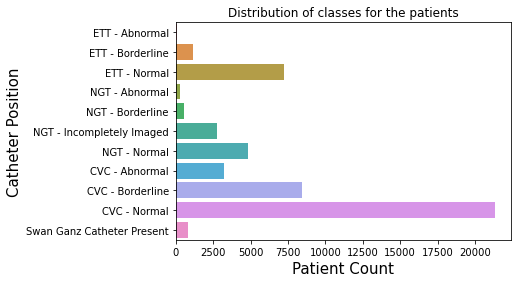

In [57]:
# we plot the distribution of patients to check if there is
sns.barplot(x=class_counts.values, y=class_counts.index)
plt.title('Distribution of classes for the patients')
plt.xlabel('Patient Count', fontsize=15)
plt.ylabel('Catheter Position', fontsize=15)
plt.show()